
# Regressão Linear, Ridge e Lasso


Realiza uma análise comparativa entre a Regressão Linear, o Ridge e o Lasso no Boston Housing Dataset.

Baseado no livro: Andreas C. Müller, Sarah Guido (2016)
*Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition*.


Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Boston Housing dataset

http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

506 registros

14 atributos



Numero de atributos original:
(506, 13)
           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
count  506.0000  506.0000  506.0000  506.0000  506.0000  506.0000  506.0000   
mean     3.6135   11.3636   11.1368    0.0692    0.5547    6.2846   68.5749   
std      8.6015   23.3225    6.8604    0.2540    0.1159    0.7026   28.1489   
min      0.0063    0.0000    0.4600    0.0000    0.3850    3.5610    2.9000   
25%      0.0820    0.0000    5.1900    0.0000    0.4490    5.8855   45.0250   
50%      0.2565    0.0000    9.6900    0.0000    0.5380    6.2085   77.5000   
75%      3.6771   12.5000   18.1000    0.0000    0.6240    6.6235   94.0750   
max     88.9762  100.0000   27.7400    1.0000    0.8710    8.7800  100.0000   

            DIS       RAD       TAX   PTRATIO         B     LSTAT  
count  506.0000  506.0000  506.0000  506.0000  506.0000  506.0000  
mean     3.7950    9.5494  408.2372   18.4555  356.6740   12.6531  
std      2.1057    8.7073  168.5371    2.164

<Figure size 432x288 with 0 Axes>

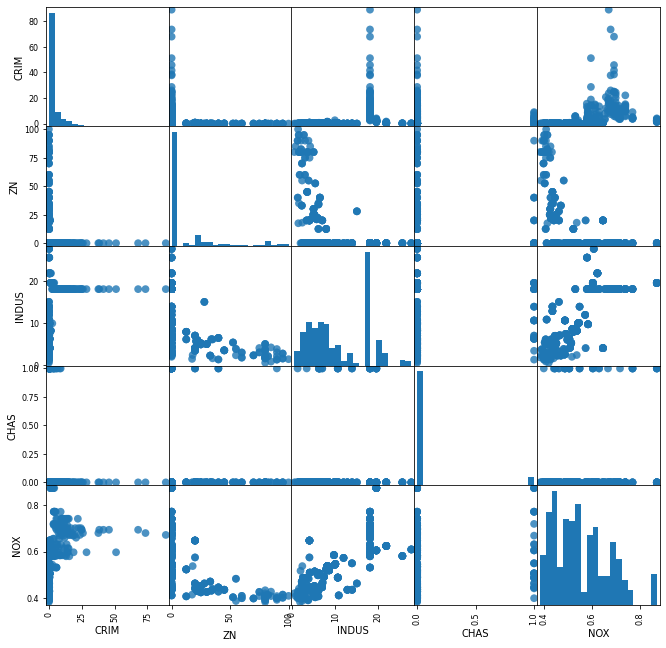

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=None, precision=4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 4)

boston = load_boston()
X = boston.data
y = boston.target




print("Numero de atributos original:")
print(X.shape)
df = pd.DataFrame(data=X, columns=boston.feature_names)
print(df.describe())
#df.to_csv(index=True)
#df.to_clipboard(sep=';')

ax2 = pd.plotting.scatter_matrix(df.iloc[:,:5], figsize=(11, 11), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.figure()


In [ ]:
X = MinMaxScaler().fit_transform(boston.data)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (original)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))
print("Rank: {}".format(lr.rank_))


s = ["{0:0.2f}".format(v) for v in lr.singular_]
print("Valores singulares: {}".format(s))


print("Descrição do modelo: ")
s = ["{0:0.2f}".format(v) for v in lr.coef_]
print("w: {}  b: {:.2f}".format(s, lr.intercept_))

Regressão Linear (original)
Coeficiente R^2 na base de treinamento: 0.75
Coeficiente R^2 na base de teste: 0.68
Número de atributos usados: 13
Rank: 13
Valores singulares: ['12.35', '6.25', '5.29', '4.40', '3.72', '3.46', '3.06', '2.66', '2.00', '1.75', '1.70', '1.59', '1.33']
Descrição do modelo: 
w: ['-11.42', '2.96', '1.33', '2.77', '-7.89', '22.80', '-0.90', '-15.41', '5.93', '-5.22', '-8.68', '5.23', '-18.76']  b: 23.43


In [1]:
# O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos 
# que são combinações lineares dos dados originais.

pol = PolynomialFeatures(degree=2, include_bias=False)
X = pol.fit_transform(X)

print("Polynomial Features (atributos redundantes):")
print(X.shape)


NameError: ignored

In [ ]:
print(boston.feature_names)
polatr = pol.get_feature_names(boston.feature_names)
print(polatr)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS', 'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS', 'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT', 'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE', 'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT', 'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE', 'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B', 'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE', 'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B', 'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD', 'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE', 'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT', 'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B', 'AGE LSTAT', 'DIS^

### Regressão Linear


Os passos para indução de um modelo são:

1.   Instanciar o modelo: ``` LinearRegression()```
2.   Treinar o modelo: ```fit()```

O método ```score()``` retorna o coeficiente R^2 de predição.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))

print("Rank: {}".format(lr.rank_))

print("Descrição do modelo: ")
s = ["{0:0.2f}".format(v) for v in lr.coef_]
print("w: {}  b: {:.2f}".format(s, lr.intercept_))


Regressão Linear (com atributos redundantes)
Coeficiente R^2 na base de treinamento: 0.94
Coeficiente R^2 na base de teste: 0.78
Número de atributos usados: 104
Rank: 103
Descrição do modelo: 
w: ['-511.13', '4.03', '-94.58', '13.47', '34.82', '60.36', '34.97', '2.94', '3.15', '82.08', '12.43', '38.67', '-0.94', '13.29', '760.32', '1422.75', '229.22', '-77.94', '87.94', '13.98', '102.57', '752.18', '-1820.72', '534.14', '-24.11', '111.85', '-4.38', '-12.31', '-3.63', '-56.49', '0.46', '8.18', '-20.63', '-34.97', '43.17', '-2.92', '14.53', '-32.43', '36.70', '-2.76', '6.28', '49.84', '6.55', '39.10', '-11.48', '-0.80', '-3.69', '33.65', '-14.91', '13.47', '-18.02', '-29.10', '-2.78', '-11.03', '1.16', '-0.84', '-7.90', '6.28', '-10.95', '-24.84', '-11.63', '-3.00', '68.35', '-17.64', '61.04', '-61.29', '-11.47', '20.91', '33.24', '-41.17', '-21.93', '-20.89', '-50.59', '-21.47', '-11.16', '-0.62', '-1.13', '-0.14', '31.76', '-25.72', '0.55', '-13.38', '-32.52', '52.08', '0.11', '-36.27'

### Ridge (Regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.


In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(ridge.coef_) > 0.001)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(ridge10.coef_) > 0.001)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(ridge01.coef_) > 0.001)))



Ridge alpha=1
Coeficiente R^2 na base de treinamento: 0.87
Coeficiente R^2 na base de teste: 0.81
Número de atributos usados: 104
Ridge alpha=10
Coeficiente R^2 na base de treinamento: 0.77
Coeficiente R^2 na base de teste: 0.73
Número de atributos usados: 104
Ridge alpha=0.1
Coeficiente R^2 na base de treinamento: 0.92
Coeficiente R^2 na base de teste: 0.82
Número de atributos usados: 104


### Comparação da Regressão linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

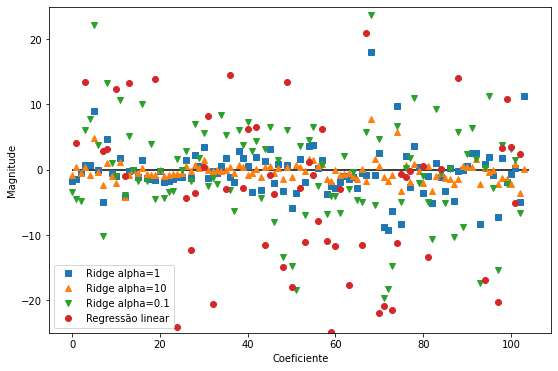

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


### LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1. ```Alpha=0``` resulta na regressão linear tradicional.


In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(lasso.coef_) >  0.001)))


lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(lasso01.coef_) >  0.001)))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(lasso001.coef_) >  0.001)))

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(lasso0001.coef_) >  0.001)))



Lasso alpha=1
Acurácia na base de treinamento: 0.27
Acurácia na base de teste: 0.26
Número de atributos usados: 3
Lasso alpha=.1
Acurácia na base de treinamento: 0.75
Acurácia na base de teste: 0.70
Número de atributos usados: 12
Lasso alpha=.01
Acurácia na base de treinamento: 0.89
Acurácia na base de teste: 0.80
Número de atributos usados: 34
Lasso alpha=.001
Acurácia na base de treinamento: 0.93
Acurácia na base de teste: 0.82
Número de atributos usados: 73


### Comparação da LASSO e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

Text(0, 0.5, 'Magnitude')

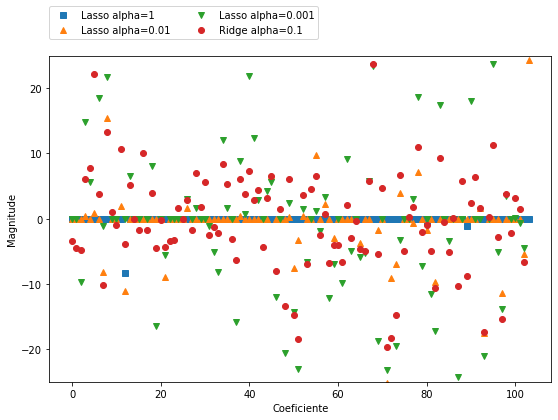

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")


In [ ]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet().fit(X_train, y_train)
print("ElasticNet alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(enet.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(enet.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(enet.coef_) > 0.001)))

enet001 = ElasticNet(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("ElasticNet alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(enet001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(enet001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(enet001.coef_) > 0.001)))

enet0001 = ElasticNet(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("ElasticNet alpha=.001")
print("Acurácia na base de treinamento: {:.2f}".format(enet0001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(enet0001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(np.abs(enet0001.coef_) > 0.001)))


ElasticNet alpha=1
Acurácia na base de treinamento: 0.29
Acurácia na base de teste: 0.30
Número de atributos usados: 34
ElasticNet alpha=.01
Acurácia na base de treinamento: 0.84
Acurácia na base de teste: 0.79
Número de atributos usados: 82
ElasticNet alpha=.001
Acurácia na base de treinamento: 0.91
Acurácia na base de teste: 0.83
Número de atributos usados: 97


Text(0, 0.5, 'Magnitude')

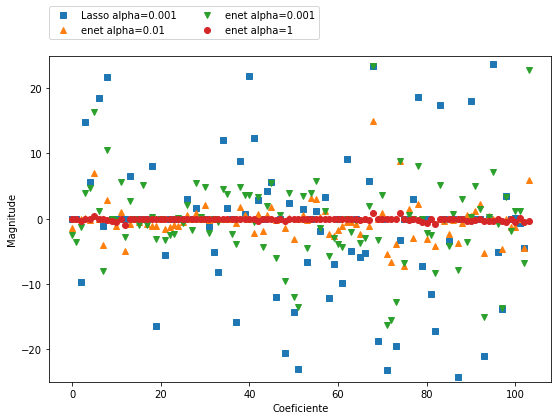

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso0001.coef_, 's', label="Lasso alpha=0.001")
plt.plot(enet001.coef_, '^', label="enet alpha=0.01")
plt.plot(enet0001.coef_, 'v', label="enet alpha=0.001")
plt.plot(enet.coef_, 'o', label="enet alpha=1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")

In [ ]:
print(np.array(polatr)[np.abs(enet.coef_) > 0.001])

['INDUS' 'NOX' 'RM' 'RAD' 'TAX' 'PTRATIO' 'LSTAT' 'INDUS AGE' 'INDUS TAX'
 'INDUS PTRATIO' 'INDUS LSTAT' 'NOX AGE' 'NOX TAX' 'NOX PTRATIO'
 'NOX LSTAT' 'RM^2' 'RM B' 'AGE^2' 'AGE RAD' 'AGE TAX' 'AGE PTRATIO'
 'AGE LSTAT' 'RAD^2' 'RAD TAX' 'RAD PTRATIO' 'RAD LSTAT' 'TAX^2'
 'TAX PTRATIO' 'TAX LSTAT' 'PTRATIO^2' 'PTRATIO LSTAT' 'B^2' 'B LSTAT'
 'LSTAT^2']
